**Name:** Muluwork Geremew 

**Course:** Advanced Big Data and Data Mining  
**Project:** Advanced Data Mining for Data-Driven Insights and Predictive Modeling (Deliverbale 2)

# Deliverable 2: Feature Engineering, Regression Modeling and Performance Evaluation
## 🔹 Plan for Deliverable 2

The objective for Deliverable 2 was to build predictive models to estimate `RETAIL SALES` based on engineered features from the cleaned dataset.

**Steps planned:**
- **Feature Engineering**:
  - Encode categorical variables: `SUPPLIER` and `ITEM TYPE` (using one-hot encoding)
  - Retain key numerical predictors: `YEAR`, `MONTH`, `RETAIL TRANSFERS`, `WAREHOUSE SALES`

- **Model Development**:
  - Build at least two regression models:
    1️⃣ Linear Regression (baseline)
    2️⃣ Ridge Regression (regularization to mitigate multicollinearity/overfitting)

- **Model Evaluation**:
  - Evaluate both models on test data using:
    - R² (Coefficient of Determination)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
  - Apply 5-fold cross-validation for assessing generalization ability

- **Comparison and Insights**:
  - Compare model performance and summarize findings.


Dataset shape after cleaning: (305803, 9)

Linear Regression Performance:
  Test R²: 0.8809
  Test MSE: 127.04
  Test RMSE: 11.27
  Cross-Validation R²: 0.9388

Ridge Regression Performance:
  Test R²: 0.8389
  Test MSE: 171.88
  Test RMSE: 13.11
  Cross-Validation R²: 0.9278

Comparison of Model Performance:
                    Test R²    Test MSE  Test RMSE     CV R²
Linear Regression  0.880949  127.041632  11.271275  0.938797
Ridge Regression   0.838928  171.883429  13.110432  0.927840


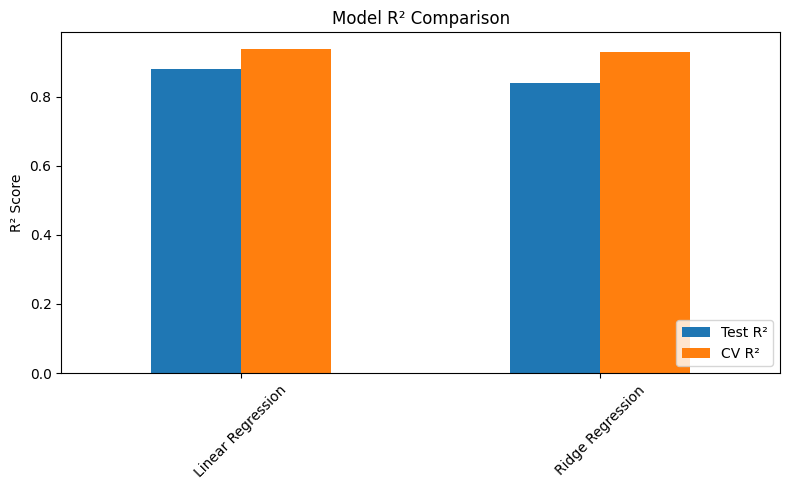

In [1]:
# Deliverable 2: Regression Modeling and Performance Evaluation

# 📦 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🔹 2️⃣ Load dataset
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

# Optional: repeat your cleaning steps here if starting fresh
df['SUPPLIER'] = df['SUPPLIER'].fillna('Unknown')
df['ITEM TYPE'] = df['ITEM TYPE'].fillna('Unknown')
df = df[df['RETAIL SALES'].notnull()]
df = df.drop_duplicates()
df = df[(df['RETAIL SALES'] >= 0) & 
        (df['RETAIL TRANSFERS'] >= 0) & 
        (df['WAREHOUSE SALES'] >= 0)]

print(f"Dataset shape after cleaning: {df.shape}")

# 🔹 3️⃣ Feature Engineering
target = 'RETAIL SALES'
features = ['YEAR', 'MONTH', 'SUPPLIER', 'ITEM TYPE', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

X = df[features]
y = df[target]

# 🔹 4️⃣ Categorical encoding using ColumnTransformer
categorical_features = ['SUPPLIER', 'ITEM TYPE']
numeric_features = ['YEAR', 'MONTH', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # leave numeric as-is
)

# 🔹 5️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 6️⃣ Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

results = {}

# 🔹 7️⃣ Train, evaluate, and cross-validate
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit model
    pipeline.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score (5-fold)
    cv_r2 = cross_val_score(pipeline, X, y, cv=5, scoring='r2').mean()
    
    # Store results
    results[name] = {
        'Test R²': r2,
        'Test MSE': mse,
        'Test RMSE': rmse,
        'CV R²': cv_r2
    }
    
    print(f"\n{name} Performance:")
    print(f"  Test R²: {r2:.4f}")
    print(f"  Test MSE: {mse:.2f}")
    print(f"  Test RMSE: {rmse:.2f}")
    print(f"  Cross-Validation R²: {cv_r2:.4f}")

# 🔹 8️⃣ Compare results in a table
results_df = pd.DataFrame(results).T
print("\nComparison of Model Performance:")
print(results_df)

# 🔹 9️⃣ Visualize comparison
results_df[['Test R²', 'CV R²']].plot(kind='bar', figsize=(8, 5))
plt.title('Model R² Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## 🔎 Analysis Based on Results

### Key Results Summary:
| Model              | Test R²  | Test MSE | Test RMSE | CV R²  |
| ------------------ | -------- | -------- | --------- | ------ |
| Linear Regression  | 0.8809   | 127.04   | 11.27     | 0.9388 |
| Ridge Regression   | 0.8389   | 171.88   | 13.11     | 0.9278 |

### Interpretation:
- **Linear Regression outperformed Ridge Regression** on both the test set and cross-validation.
  - Higher R² (0.8809 vs 0.8389)
  - Lower RMSE (11.27 vs 13.11)
  - Slightly better cross-validation R² (0.9388 vs 0.9278)

- The results suggest that:
  - **Linear Regression captured most of the variance in `RETAIL SALES` effectively without overfitting.**
  - Regularization with Ridge did not improve generalization; this indicates that the predictors used were already appropriate and multicollinearity was not severely affecting baseline model performance.

### Additional Observations:
- The relatively high R² values (> 0.83 for both models) indicate that the dataset’s features explain a substantial proportion of the variance in retail sales outcomes.
- The dataset’s skewness and outliers (retained intentionally) may still impact prediction accuracy for extreme values, suggesting a potential improvement area (e.g., log transformation or robust regression methods).
